<a href="https://colab.research.google.com/github/Carola1087/Bootcamp/blob/Practicas/Clase_4_6Marzo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Series de tiempos**



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns #Libreria para crear graficso estadisticos
import matplotlib.pyplot as plt #libreria para crear gráficos generales
sns.set_theme(style="whitegrid", palette='Set2', font='sans-serif') #Establecer el estilo de los gráficos


In [ ]:
df_hurto_motos = pd.read_csv('/content/hurto_de_moto.csv.xls')
df_hurto_motos.head()

In [ ]:
##transformación de fecha de hecho
df_fecha = pd.Series(df_hurto_motos['fecha_hecho'])
df_fecha

,fecha_hecho
0,2017-01-01T23:00:00.000-05:00
1,2017-01-01T20:30:00.000-05:00
2,2017-01-01T07:00:00.000-05:00
3,2017-01-01T09:00:00.000-05:00
4,2017-01-01T16:30:00.000-05:00
...,...
86405,2023-11-30T08:15:00.000-05:00
86406,2023-11-30T08:30:00.000-05:00
86407,2023-11-30T16:00:00.000-05:00
86408,2023-11-30T20:13:00.000-05:00


In [ ]:
df_fecha = df_fecha.str.split('T') #queda como una lista, la fecha esta como tipo string y realice el split en la posición de la T
df_fecha

,fecha_hecho
0,"[2017-01-01, 23:00:00.000-05:00]"
1,"[2017-01-01, 20:30:00.000-05:00]"
2,"[2017-01-01, 07:00:00.000-05:00]"
3,"[2017-01-01, 09:00:00.000-05:00]"
4,"[2017-01-01, 16:30:00.000-05:00]"
...,...
86405,"[2023-11-30, 08:15:00.000-05:00]"
86406,"[2023-11-30, 08:30:00.000-05:00]"
86407,"[2023-11-30, 16:00:00.000-05:00]"
86408,"[2023-11-30, 20:13:00.000-05:00]"


In [ ]:
#separación de fechas y horas
df_fecha = pd.DataFrame(df_fecha) ##Convierto de series de pandas a dataframe
df_fecha = pd.DataFrame(df_fecha.fecha_hecho.values.tolist(), index = df_fecha.index)
##saco los valoes de la lista y luego se indica que tome el indice original del campo fecha
df_fecha

,0,1
0,2017-01-01,23:00:00.000-05:00
1,2017-01-01,20:30:00.000-05:00
2,2017-01-01,07:00:00.000-05:00
3,2017-01-01,09:00:00.000-05:00
4,2017-01-01,16:30:00.000-05:00
...,...,...
86405,2023-11-30,08:15:00.000-05:00
86406,2023-11-30,08:30:00.000-05:00
86407,2023-11-30,16:00:00.000-05:00
86408,2023-11-30,20:13:00.000-05:00


In [ ]:
df_fecha = df_fecha.rename(columns={0: 'fecha', 1: 'hora'})#definir los indices y las columnas, renombro columnas
df_fecha

,fecha,hora
0,2017-01-01,23:00:00.000-05:00
1,2017-01-01,20:30:00.000-05:00
2,2017-01-01,07:00:00.000-05:00
3,2017-01-01,09:00:00.000-05:00
4,2017-01-01,16:30:00.000-05:00
...,...,...
86405,2023-11-30,08:15:00.000-05:00
86406,2023-11-30,08:30:00.000-05:00
86407,2023-11-30,16:00:00.000-05:00
86408,2023-11-30,20:13:00.000-05:00


In [ ]:
#crear otro dataframe para transoformarlo a datetime
df_fecha_datatime = pd.to_datetime(df_fecha['fecha'], format = '%Y-%m-%d')
df_fecha_datatime

,fecha
0,2017-01-01
1,2017-01-01
2,2017-01-01
3,2017-01-01
4,2017-01-01
...,...
86405,2023-11-30
86406,2023-11-30
86407,2023-11-30
86408,2023-11-30


In [ ]:
type(df_fecha_datatime)

pandas.core.series.Series

In [ ]:
df_fecha_datatime.min()#sacar la fecha minima

Timestamp('2003-01-01 00:00:00')

In [ ]:
df_fecha_datatime.max()#sacar la fecha máxima

Timestamp('2023-11-30 00:00:00')

In [ ]:
df_fecha_datatime_mes = df_fecha_datatime.dt.month #identificar el mes de cada registro. nuevo dataframe
df_fecha_datatime_mes

In [ ]:
df_fecha_datatime_dia = df_fecha_datatime.dt.day_of_week #identificar el día de cada registro. nuevo dataframe
df_fecha_datatime_dia #lunes 0, domingo 6

In [ ]:
#sacar los registros unicos y ordernarlos
dia_ordenado = pd.unique(df_fecha_datatime_dia)
dia_ordenado.sort()
dia_ordenado

array([0, 1, 2, 3, 4, 5, 6], dtype=int32)

In [ ]:
df_fecha_datatime_dia = pd.DataFrame(df_fecha_datatime_dia)
df_fecha_datatime_dia

In [ ]:
#Realizo un histograma sobre los días
sns.histplot(data=df_fecha_datatime_dia, x="fecha", stat="count") #contar cuantos registros hay de cada uno
plt.xticks(rotation=90) #para rotar

In [ ]:
#convertir a dataframe de la fecha del mes
df_fecha_datatime_mes = pd.DataFrame(df_fecha_datatime_mes)
df_fecha_datatime_mes

In [ ]:
#Histograma del mes que más roban
sns.histplot(data=df_fecha_datatime_mes, x="fecha", stat="count") #contar cuantos registros hay de cada uno
#plt.xticks(rotation=90) #para rotar

In [ ]:
df_fecha_datatime_anio = df_fecha_datatime.dt.year #identificar el año de cada registro. nuevo dataframe
df_fecha_datatime_anio

In [ ]:
df_fecha_datatime_anio = pd.DataFrame(df_fecha_datatime_anio)
df_fecha_datatime_anio

,fecha
0,2017
1,2017
2,2017
3,2017
4,2017
...,...
86405,2023
86406,2023
86407,2023
86408,2023


In [ ]:
#histograma con los años que más roban
sns.histplot(data=df_fecha_datatime_anio, x="fecha", stat="count") #contar cuantos registros hay de cada uno
plt.xticks(rotation=90) #para rotar

In [ ]:
df_fecha_agr =df_fecha.groupby('fecha').size()
df_fecha_agr #agrupo por fechas para determinar la cantidad de hurtos para la autocorrelacion

In [ ]:
#calcular autocorrelación en series de tiempos. corrrelación de días anteriores
from statsmodels.graphics.tsaplots import plot_acf #libreria de funcion de autocorrelación. Consultar página https://www.statsmodels.org/stable

plt.figure(figsize=(12,6)) #define el tamaño
plot_acf(df_fecha_agr) #
plt.xlabel('Lag') #información para el eje X. Lags para hacer escalas de tiempo hacía atras
plt.ylabel('Autocorrelación') #informción de eje Y, para indicar la fuerza de la correlación
plt.title('Autocorrelación de la serie de tiempo') #Titulo para el gráfico
plt.show() #Para mostrar el gráfico


In [ ]:
#convertir todos los caracteres a minuscula
df_hurto_motos.nombre_barrio =df_hurto_motos.nombre_barrio.str.lower()
#quitar espacios en blanco del final
df_hurto_motos.nombre_barrio = df_hurto_motos.nombre_barrio.str.strip()

In [ ]:
#retorna todos los valores unicos de la columna nombre barrio
barrios = df_hurto_motos['nombre_barrio'].unique()
#ordernar alfabeticamente
barrios.sort()
barrios

array(['aguas frias', 'aldea pablo vi', 'alejandro echavarría',
       'alejandría', 'alfonso lópez', 'altamira', 'altavista',
       'altavista sector central', 'altos del poblado', 'andalucía',
       'antonio nariño', 'aranjuez', 'asomadera no.1', 'asomadera no.2',
       'asomadera no.3', 'astorga', 'aures no.1', 'aures no.2',
       'b. cerro el volador', 'barrio caycedo', 'barrio colombia',
       'barrio colón', 'barrio cristóbal', 'barrios de jesús',
       'barro blanco', 'batallón cuarta brigada', 'batallón girardot',
       'belalcázar', 'belencito', 'bello horizonte', 'belén', 'berlin',
       'bermejal-los alamos', 'betania', 'blanquizal', 'bolivariana',
       'bomboná no.1', 'bomboná no.2', 'boqueron', 'bosques de san pablo',
       'boston', 'boyacá', 'brasilia', 'buenos aires',
       'buga patio bonito', 'calasania parte alta', 'calasanz',
       'calle nueva', 'campo alegre', 'campo amor', 'campo valdés no.1',
       'campo valdés no.2', 'caribe', 'carlos e. restrepo

In [ ]:
!pip install fuzzywuzzy #Instalar libreria

In [ ]:
#iportar libreria spara identiifcar registros simiilares
import fuzzywuzzy as fuzz
from fuzzywuzzy import process
import charset_normalizer

/usr/local/lib/python3.11/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
!pip install fuzzywuzzy #Install the fuzzywuzzy package. This should be executed first

#Import the fuzzywuzzy package
import fuzzywuzzy
from fuzzywuzzy import process
import charset_normalizer

#convertir todos los caracteres a minuscula
df_hurto_motos.nombre_barrio =df_hurto_motos.nombre_barrio.str.lower()
#quitar espacios en blanco del final
df_hurto_motos.nombre_barrio = df_hurto_motos.nombre_barrio.str.strip()

#retorna todos los valores unicos de la columna nombre barrio
barrios = df_hurto_motos['nombre_barrio'].unique()
#ordernar alfabeticamente
barrios.sort()


matches = fuzzywuzzy.process.extract("sin dato", barrios, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

In [ ]:
matches = fuzzywuzzy.process.extract("Manrique", barrios, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches #el numero es que tanto coincide con el texto ingresado

[('manrique oriental', 64),
 ('palenque', 62),
 ('sin dato 3 manrique', 59),
 ('caribe', 57),
 ('manila', 57),
 ('manrique central no.1', 55),
 ('manrique central no.2', 55),
 ('aranjuez', 50),
 ('parque norte', 50),
 ('la mansión', 47)]

**CLASE 6 DE MARZO**

In [ ]:
##Diagrama de cajas - visualizar categorias del comportamiento de una variable
df_hurto_personas = pd.read_csv('/content/hurto_a_persona.csv.xls')
df_hurto_personas.head()

In [ ]:
#Diagrama
plt.figure(figsize=(8,5)) #Establezco el tipo
sns.boxplot(
    x=df_hurto_personas['estado_civil'], #Valores eje x
    y=df_hurto_personas['edad'], #valores eje y
    palette='pastel' #colores
)
plt.title(
    'Distribución de hurtos de personas por edades y sexo', #Titulo
    fontsize=15, #tamaño
    fontweight='bold' #negrita
)
plt.xlabel(
    'estado_civil', #Titulo eje x
    fontsize=13, #tamaño
    fontweight='bold' #negrita
)
plt.ylabel(
    'edad', #Titulo eje y
    fontsize=13, #tamaño
    fontweight='bold' #negrita
)
plt.xticks(rotation=90) #para rotar
plt.show()

In [ ]:
#grafico sin apilar categorias
sns.catplot(
    x='estado_civil',
    y='edad',
    hue='sexo',
    kind='bar',
    data = df_hurto_personas)
plt.xticks(rotation=90) #para rotar
plt.show()

<Figure size 4000x1000 with 0 Axes>

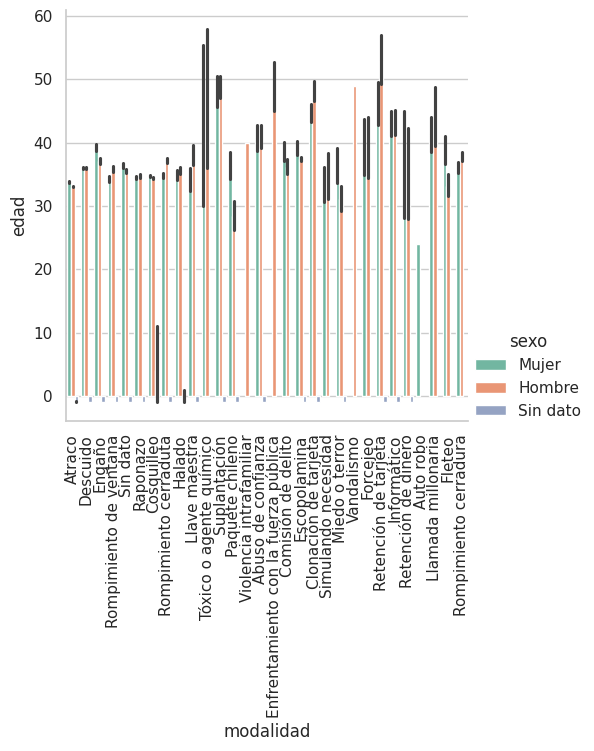

In [ ]:
#Grafica por modalidad de hurto en edades y haciendo enfasis en sexo, promedio de edades por modalidad de robo y sexo
plt.figure(figsize=(40,10))
sns.catplot(
    #data = df_hurto_personas.head(20),#solo genere la gráfica con los primeros 20 registros.
    data = df_hurto_personas,
    x='modalidad',
    y='edad',
    hue='sexo',
    kind='bar')
plt.xticks(rotation=90) #para rotar
plt.show()
#